
# NLP Modelling


In [1]:
# Libraries
import pandas as pd
import numpy as np
import scipy as sp
import re
import string
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction import text
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pyLDAvis
import gensim
import pyLDAvis.gensim 
from nltk.stem import WordNetLemmatizer


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


/Users/garimamahajan/anaconda3/lib/python3.7/site-packages/socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable
/Users/garimamahajan/anaconda3/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
jobs = pd.read_csv('job_postings.3.csv')

In [3]:
jobs= jobs.drop(['Unnamed: 0'],axis=1)

In [4]:
jobs.head()

,job_area,job_classification,job_company,job_description,job_location,job_type,job_title,job_salary,salary_cat
0,CBD and Inner Suburbs,Science and Technology,SEEK Limited,The Opportunity We're looking for an experienc...,Melbourne,Full Time,senior data scientist,150000.0,high
1,Parramatta and Western Suburbs,Information and Communication Technology,ecareer employment services,Put Data to best useDesign & Develop BI Soluti...,Sydney,Full Time,senior data scientist,135000.0,high
2,Ryde and Macquarie Park,Information and Communication Technology,Ricoh Australia,"Our Company At Ricoh, we understand that being...",Sydney,Full Time,data scientist,140000.0,high
3,CBD and Inner Suburbs,Information and Communication Technology,sportsbetcomau,About us:\nSportsbet is Australia’s leading on...,Melbourne,Full Time,data scientist,140000.0,high
4,CBD and Inner Suburbs,Consulting and Strategy,sportsbetcomau,About us:\nSportsbet is Australia’s leading on...,Melbourne,Full Time,data scientist,140000.0,high


### Cleaning the text data.

In [5]:
def remove_nums(text):
    text= text.lower()
    text =re.sub('[^\s]*[0-9]+[^\s]*', ' ', text)
    text= re.sub('\xa0', ' ', text)
    text= re.sub('\n', ' ', text)
    text = re.sub('–',' ',text)
    text=re.sub("([^\x00-\x7F])+"," ",text)
    text= re.sub(r'[%s]'% re.escape(string.punctuation), ' ', text)

    return text

In [6]:
jobs['job_description'] = jobs['job_description'].map(remove_nums)

### Stop Words

In [7]:
list_of_stop_words = ['data','perform','abilities','current','responsibilties','vision','department',
'migration','world','minimum','maximum','able','follow','month','year','day','issue','meet','resume','package',
'think','make','global','policy','professional','expertise','right','candidate','react','consult','platform',
'requirements','role','opportunity','undertake','meet','selection','available','description','salary','latest',
'growth','recruitment','analyticts','scientist','love','hand','bi','business','sales','analyst',"academics",
'aboriginal','ability','aaron','accelerate','accept','staff','sales','government','transport', 'issue','jll',
'future','consult','react','intelligence','intern', 'sciencerecruit','rapidly','growth','world','architecture',
'financial','platform','consult','start','react','infrastructure','start','react','practice','want','skills',
'interests','frameworks','sydney','brisbane','perth','melbourne','automate','problems','functional','functional','warehouse',
'consultant',"experimentation", 'bigger', 'enjoy' ,'code','bachelors', 'lending','teachers','maintained','society',
'workbench', 'jira' ,'working' ,'enjoys' ,'techniques' ,'difference' ,'lunch', 'qlikview', 'webpage' ,'team',
'spa','experimentation','size' ,'analytically', 'reporter','analysing','teachers','manpowergroup','workbench', 
'working', 'known', 'stressful', 'promotes','supplier' ,'solid','ingestion','inspiring','stack','teams', 'applied',
'cycles','unless' ,'acu', 'requiring', 'warehousing', 'supplier','performed', 'strong' ,'planning' ,'efficiency',
'strives', 'detailed' ,'cd' ,'valuing', 'troubleshoot','requiring' ,'aimed' ,'lending' ,'adelaide' ,'maintained',
'integral' ,'efficiency' ,'unless', 'conduit' ,'audience' ,'areyou','asap' ,'society' ,'idam' ,'sss', 'caring',
'incomplete' ,'authoring' ,'fair',"minerals",'spread', 'backed','interaction' ,'evidence', 'utilise','diagnostic',
'difference', 'david' ,'warehousing','detailed' ,'reportingidentify' ,'date' , 'nanjing' ,'diagnose',
'capturing', 'club', 'prioritisation', 'competitive' ,'hfc', 'lester','motivated', 'bonus','inspired','spectrum',
'seven', 'evaluation' ,'epic', 'performance' ,'services' ,'office' ,'finite', 'contribute','host', 'frontend',
'alteryx' 'contacted' 'lockheed' 'using' 'workbench' 'campuses' 'round' 'rac' 'nix' 'appropriately' 'engine',
'metric' ,'promoting',  'beverage' ,'energetic', 'talenza' ,'venues' ,'recognised', 'integrating', 'billigence', 
'analytically' ,'directors', 'grow', 'breakdown' ,'inspiring' ,'discriminate', 'compensation' ,'graduate',
'extension' ,'wider', 'route', 'citizen' ,'buying' ,'larger', 'mentor','pharmaceutical','iaas',
'exploring' ,'participation', 'breakdown' ,'week' ,'hearing' ,'www' ,'spans', 'look' ,'sacrificing' ,'guidelines',
                      
'marketing', 'arrangements', 'growing', 'engine', 'pick' ,'anticipate' ,'dpe' ,'regression', 'leave', 'spaces',
'tertiary', 'society' , 'moving','goal', 'planning' ,'athena','expanding', 'solentive', 'plan' ,
'specialisations', 'engine' ,'testable' ,'uses' ,'sector', 'interaction' ,'jenkinbeattie', 'acceptance',
'experience', 'analytics' ,'reporting','work', 'analysis','solutions', 'key', 'project' ,'support', 
'technical' ,'development', 'information', 'insights', 'stakeholders', 'apply', 'customer', 'knowledge', 'complex',
'learning', 'science', 'experience', 'work','looking' ,'developer','product', 'development','engineer', 'senior',
'research', 'aiml', 'learning' ,'institute' ,'edu' ,'university', 'computer','attractive', 'area','artificial' 
'ian', 'software','career', 'programs' ,'including' ,'australia' ,'facilities', 'lockheed', 'martin',
'university' ,'research', 'position', 'support' ,'mission', 'student', 'students','design','catholic', 'valued', 
'applications', 'opsm' ,'level' ,'pa' ,'strategic' ,'trobe' ,'staging', 'response', 'criteria',
'server', 'using' ,'developer' ,'reports', 'development', 'dashboards' ,'design', 'develop', 'cubes', 
'dimensional','experience' ,'engineering', 'building', 'etl' ,'build' ,'systems', 'processing','capgemini', 
'clients', 'prior' ,'companies' ,'helps', 'modesty', 'boldness', 'insight', 'spirit', 'ethisphere', 'entitlements' ,'people','ocean' ,'continuance', 'honesty','freedom', 'shopping','rewards',
'ethical','ranked','consultants', 'consulting', 'servian', 'curious' ,'variety' ,'technologists' ,'alongside',
'learning', 'structured' ,'firm', 'eager','sharing', 'technologies' ,'leadership' , 'analytics', 
'development' ,'sociable','large' ,'having', 'algorithms' ,'contract' ,'client','physically', 'regardedprevious',  
'algorithmsexperience', 'press', 'modelsstrong' ,'construct', 'stringent', 'company', 'constructing',
'initially', 'compiling', 'highlight','insurance', 'analytics' ,'greenstone', 'digital', 'brands',
'communicating' ,'discipline', 'white', 'bustle','labelled','choosi' ,'exposure', 'pet', 'guardian' ,'credible',
                      'hustle','junior','ll','emr','big','management','health','nsw','dw','machine','models','big',
                      'ai'

]

In [8]:
stop_w=list(text.ENGLISH_STOP_WORDS)
custom_list = stop_w + (list_of_stop_words)

### Baseline 

In [9]:
jobs['job_title'].value_counts()/len(jobs['job_title'])*100

data analyst                    33.485714
data engineer                   25.257143
data scientist                  18.971429
business intelligence           13.257143
senior business intelligence     4.000000
senior data scientist            3.542857
junior data engineer             0.800000
junior data analyst              0.685714
Name: job_title, dtype: float64

### Splitting the X and y Variable

In [10]:
X= jobs.job_description
y= jobs.job_title

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


> ### CountVectorizer 

In [12]:
def lemm_text(text):
    text_blob = TextBlob(text)
    lemmetized_text = [word.lemmatize() for word in text_blob.words]
    return lemmetized_text

In [13]:
#fitting the X-variable
cv= CountVectorizer(stop_words=custom_list,max_features=4000, min_df=0.005,analyzer=lemm_text).fit(X_train)

In [14]:
# transforming the X-train and X-test
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

**Multinomial Naive Bayes**

In [15]:
nb = MultinomialNB()
nb.fit(X_train_cv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
y_pred = nb.predict(X_test_cv)

In [17]:
score1=nb.score(X_test_cv, y_test)

In [18]:
print('accuracy score with MultinomialNB: ',round(score1,3))

accuracy score with MultinomialNB:  0.639


**Logistic regression**

In [19]:
lr= LogisticRegression(solver='newton-cg', C= 6,penalty='l2')

In [20]:
lr.fit(X_train_cv,y_train)

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
y_pred= lr.predict(X_test_cv)

In [22]:
score2=lr.score(X_test_cv,y_test)

In [23]:
print('accuracy score with Logistic Regression: ',round(score2,3))

accuracy score with Logistic Regression:  0.63


**Decesion Tree Classifier**

In [24]:
params = {'max_depth':[3,4,5,6],
         'max_leaf_nodes':[2,4,6],
         'min_samples_split':[2,3,4,5,10,15,25],
         'max_features':[5,10,50,100,500]}

dtc_gs = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
dtc_gs.fit(X_train_cv, y_train)
dtc = dtc_gs.best_estimator_
print(dtc_gs.best_params_)

{'max_depth': 4, 'max_features': 500, 'max_leaf_nodes': 6, 'min_samples_split': 15}


In [25]:
dtc_pred = dtc.predict(X_test_cv)
score3 = dtc.score(X_test_cv, y_test)

In [26]:
print('accuracy score with Decesion Tree: ',round(score3,3))

accuracy score with Decesion Tree:  0.566


**Random Forest Tree Classifier**

In [27]:
rf_params = {'n_estimators': [5,10,15,30,50],
            'max_features':[5,20,50,100,250,500],
            'min_samples_leaf':[1,5,10],
            'min_samples_split':[2,5,20,25]}
rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_gs.fit(X_train_cv, y_train)
rf = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'max_features': 500, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


In [28]:
rf_pred = rf.predict(X_test_cv)
score4 = rf.score(X_test_cv, y_test)

In [29]:
print('accuracy score with Random Forest Tree: ',round(score4,3))

accuracy score with Random Forest Tree:  0.667


In [30]:
#Using Countvectorizer
models = ['Multinomial NB','LogisticRegression','RandomForest']
accuracy = [score1, score2, score4]
summary = pd.DataFrame({'Model':models, 'Accuracy':accuracy})
summary = pd.DataFrame(summary.set_index('Model'))

In [31]:
summary

,Accuracy
Model,
Multinomial NB,0.639269
LogisticRegression,0.630137
RandomForest,0.666667


>### TFIDF

In [32]:
tfidf= TfidfVectorizer(stop_words=custom_list,max_features=4000, min_df=0.0001).fit(X_train)

In [33]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**Multinomial Naive Bayes**

In [34]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
y_pred= nb.predict(X_test_tfidf)

In [36]:
score1=nb.score(X_test_tfidf,y_test)

In [37]:
print('accuracy score with MultinomialNB: ',round(score1,3))

accuracy score with MultinomialNB:  0.53


**Logistic Regression**

In [38]:
lr= LogisticRegression(solver='newton-cg', C= 6,penalty='l2')

In [39]:
lr.fit(X_train_tfidf,y_train)

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
y_pred = lr.predict(X_test_tfidf)

In [41]:
score2=lr.score(X_test_tfidf,y_test)

In [42]:
print('accuracy score with Logistic Regression: ',round(score2,3))

accuracy score with Logistic Regression:  0.621


**Decesion Tree**

In [43]:
params = {'max_depth':[3,4,5,6],
         'max_leaf_nodes':[2,4,6],
         'min_samples_split':[2,3,4,5,10,15,25],
         'max_features':[5,10,50,100,500]}

dtc_gs = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
dtc_gs.fit(X_train_tfidf, y_train)
dtc = dtc_gs.best_estimator_
print(dtc_gs.best_params_)

{'max_depth': 6, 'max_features': 500, 'max_leaf_nodes': 6, 'min_samples_split': 15}


In [44]:
dtc_pred = dtc.predict(X_test_tfidf)
score3 = dtc.score(X_test_tfidf, y_test)

In [45]:
print('accuracy score with Decesion Tree: ',round(score3,3))

accuracy score with Decesion Tree:  0.425


**Random Forest Tree Classifier**

In [46]:
rf_params = {'n_estimators': [5,10,15,30,50],
            'max_features':[5,20,50,100,250,500],
            'min_samples_leaf':[1,5,10],
            'min_samples_split':[2,5,20,25]}
rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_gs.fit(X_train_tfidf, y_train)
rf = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'max_features': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


In [47]:
rf_pred = rf.predict(X_test_tfidf)
score4 = rf.score(X_test_tfidf, y_test)

In [48]:
print('accuracy score with Random Forest Tree: ',round(score4,3))

accuracy score with Random Forest Tree:  0.589


In [49]:
# using TFIDF
models = ['Multinomial NB','LogisticRegression','RandomForest']
accuracy = [score1, score2, score4]
summary = pd.DataFrame({'Model':models, 'Accuracy':accuracy})
summary = pd.DataFrame(summary.set_index('Model'))

In [50]:
summary

,Accuracy
Model,
Multinomial NB,0.529680
LogisticRegression,0.621005
RandomForest,0.589041


### Getting a df from the TFIDF vectorizer

In [51]:
df  = pd.DataFrame(X_train_tfidf,
                   columns=tfidf.get_feature_names(),
                   index=['data analyst','data engineer','data scientist','business intelligence',
                          'senior data analyst','senior business intelligence','senior data scientist',
                          'junior data analyst','junior data engineer'])

In [52]:
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_train_tfidf.toarray()).flatten()[::-1]

In [53]:
n = 100
top_n = feature_array[tfidf_sorting][:n]

In [54]:
df.shape

(9, 4000)

In [55]:
top_n

array(['modis', 'amanda', 'committed', 'predictive', 'privacy',
       'collection', 'class', 'developed', 'talented', 'online',
       'descriptive', 'departmental', 'adecco', 'cornerstone', 'laws',
       'lodged', 'formally', 'processed', 'assessing', 'computational',
       'agree', 'correctly', 'statements', 'modelling', 'submitted',
       'proposals', 'dynamics', 'recognise', 'assess', 'handling',
       'invite', 'range', 'workload', 'forms', 'likely', 'preparing',
       'canberra', 'manipulation', 'undertaking', 'read', 'delivered',
       'backgrounds', 'directed', 'allow', 'requests', 'professionals',
       'expected', 'regarding', 'details', 'inclusion', 'query', 'centre',
       'individuals', 'actively', 'workforce', 'member', 'industries',
       'skill', 'datasets', 'patterns', 'personal', 'bring', 'mining',
       'encourage', 'employment', 'national', 'mathematics', 'capability',
       'set', 'managing', 'wide', 'employer', 'equal', 'real',
       'statistics', 'id

### Getting the top Features from the data

In [58]:
index=['data analyst','data engineer','data scientist','business intelligence',
                          'senior data analyst','senior business intelligence','senior data scientist',
                          'junior data analyst','junior data engineer']

In [59]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [65]:
# top_tfidf_feats(index,tfidf.get_feature_names(),top_n=25)

In [66]:
index=['data analyst','data engineer','data scientist','business intelligence',
                          'senior data analyst','senior business intelligence','senior data scientist',
                          'junior data analyst','junior data engineer']

In [67]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = X_train_tfidf[grp_ids].toarray()
    else:
        D = X_train_tfidf.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [68]:
# top_mean_feats(X_train_tfidf, tfidf.get_feature_names(), grp_ids=None, min_tfidf = 0.1, top_n= 10)

In [69]:
def top_feats_by_class(X_train_tfidf, y_train, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y_train)
    for label in labels:
        ids = np.where(y_train==label)
        feats_df = top_mean_feats(X_train_tfidf,features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [70]:
feature_list=top_feats_by_class(X_train_tfidf, y_train, tfidf.get_feature_names(), min_tfidf=0.1, top_n=15)

In [71]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(40, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

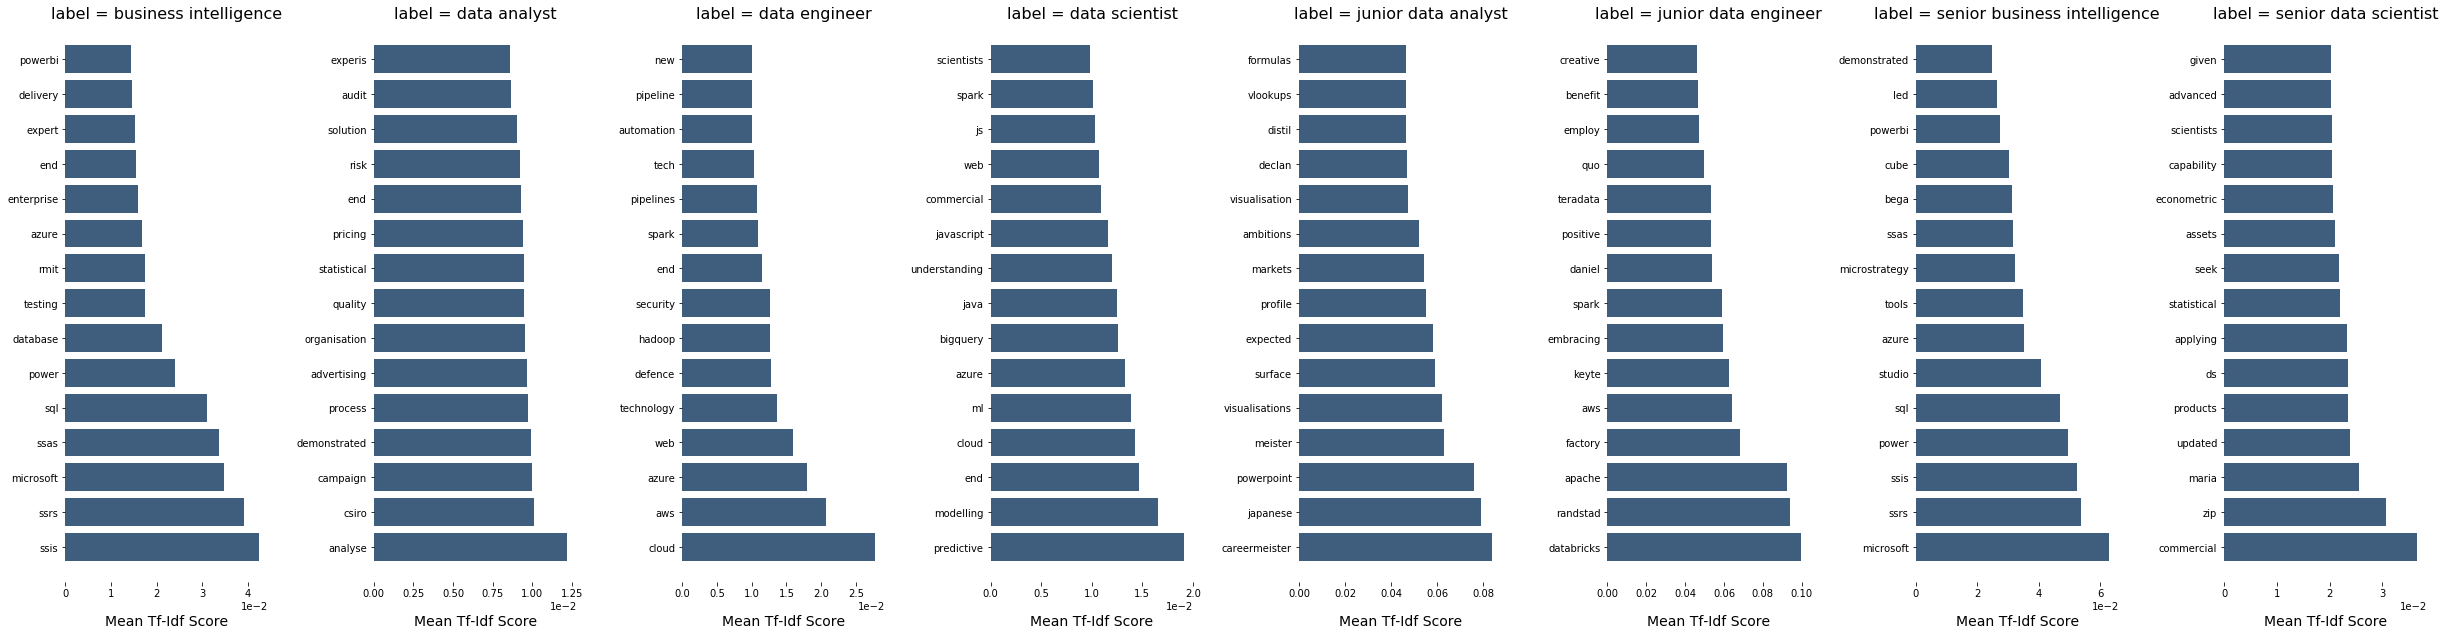

In [72]:
plot_tfidf_classfeats_h(feature_list)

In [73]:
def print_top_words(model,features_names, n_top_words):
    for topic_idx,topic in enumerate (model.components_):
        message= "topic #%d" % topic_idx
        message += ' '.join([features_names[i]
                            for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
nmf = NMF(n_components=10, random_state=1, alpha=.1,l1_ratio =.5).fit(X_train_tfidf)

print("\n Topics in NMF model(Forbenius norm):")
tfidf_feature_names= tfidf.get_feature_names()
print_top_words(nmf,tfidf_feature_names,20)
        


 Topics in NMF model(Forbenius norm):
topic #0new sql environment technology tools quality projects high organisation based years processes communication required leading provide join highly delivery deliver
topic #1cloud aws java spark tech pipelines web python hadoop engineers javascript scala gcp devops end like new technology apache programming
topic #2ssis ssrs ssas microsoft sql power database ms tabular custom azure powerbi format word end databases expert integration delivered modelling
topic #3files north enterprise contribution groups expected document risk excellence collaboratively demonstrate delivery visit effective members community operational hints strathfield pursues
topic #4ian artificial constant broader leading scope division offers au provides clinic believers virtually inspiration collaborations positions uniquely endeavour embraces surrounded
topic #5azure iot architect lake microsoft integration sql factory storage paas jd organisations thank components wareho